# ET y ev4 Fundamentos de Machine Learning
Desarrollado por:
Hans Lopez, Victoria Inostroza, Jose Lopez

#	Entendiendo el negocio
El el siguiente estudio se empleó la metodologia de analisis de datos CRISP-DM en sus primeras fases, partiendo desde el entendimiento del negocio, pasando por el entendimiento de los datos y la transformación de estos.

El set de datos que se nos ha proporcionado es relevante ya que con sus variables podemos realizar tareas de predicción empleando modelos de regresión y clasificacion.

Alguno de los objetivos que podemos trabajar en las siguientes fases son, por ejemplo: Utilizar los datos recopilados para identificar patrones y tendencias en el comportamiento de los jugadores y tomar decisiones informadas sobre el desarrollo del juego e intentar predecir las partidas ganadas

#	Entendiendo los datos

El tamaño del set de datos con el que trabajamos es de 79 mil 157 filas distribuidas en 29 columnas, conociendo así los tipos de datos que existen en el dataframe, pudiendo clasificarlos según corresponda.

También encontramos tres registros donde existian datos NaN (o valores faltantes) y posteriormente fueron tratados. Agregado a esto con el set de datos pudimos descubrir la naturaleza de los datos, calcular estadisticos basicos y ver la distribucion de los datos y la correlación de ellos

#	Transformación de los datos
## Carga e instalación de las librerias

In [4]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.6 MB/s eta 0:00:00


Se cargan las librerias necesarias para realizar el proceso

In [95]:
from scipy.stats import pearsonr
import pickle as pickle

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import category_encoders as ce

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  name=fn
df = pd.read_csv(name, sep=";", low_memory=False)

Saving Anexo ET_demo_round_traces_2023.csv to Anexo ET_demo_round_traces_2023.csv


* Función para ignorar los warning que pueda producir el codigo

In [7]:
import warnings 
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)

Se crea un respaldo del dataframe original y se omiten posibles warning que genere el proyecto


In [8]:
respaldo_df = df # se almacena en una variable llamada respaldo_df

In [9]:
df = respaldo_df # para cargar el dataframe cargado en el respaldo

--------------------------------------------------------------

* Se elimina la columna "unnamed:0" que es generada por pandas para indexar las filas

In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

--------------------------------------------------------------

* matriz de correlación de Pearson ,
con estos datos sacados podemos decir lo siguiente:


1.   Las variables "Survived" y "RoundKills" tienen una corr (0.331619), lo que quiere decir es que, mientras mas muertes realice un jugador mas posibilidades tiene de sobrevivir.
2.   Las variables "RoundHeadshots" y "RoundKills" tienen una corr (0.205279), lo que quiere decir es que, mientras mas muertes en la cabeza realice un jugador mas posibilidades tiene de sobrevivir.
3.   Las variables "RoundAssists" y "Survived" tienen una corr (-0.063264), lo que quiere decir es que, mientras mas asistencias existen en el round tiene menos probabilidades de sobrevivir, ejemplo: en una ronda un jugador no alcanza a ejecutar la muerte y muere, pero un compañero lo acaba eliminando y completando la asistencia.


In [11]:
corr = df.corr()
print(corr)

                             InternalTeamId   MatchId   RoundId  Survived  \
InternalTeamId                     1.000000  0.000027 -0.000008  0.044872   
MatchId                            0.000027  1.000000  0.001476 -0.003239   
RoundId                           -0.000008  0.001476  1.000000 -0.015361   
Survived                           0.044872 -0.003239 -0.015361  1.000000   
AbnormalMatch                           NaN       NaN       NaN       NaN   
RLethalGrenadesThrown              0.039136  0.003009  0.065327  0.171732   
RNonLethalGrenadesThrown          -0.005408 -0.009234  0.073314  0.125064   
PrimaryAssaultRifle                0.001750 -0.027313  0.085892  0.110008   
PrimarySniperRifle                 0.042205  0.043119  0.026291  0.067100   
PrimaryHeavy                       0.006337  0.003769 -0.003975  0.002006   
PrimarySMG                         0.004186  0.017847 -0.029860  0.026469   
PrimaryPistol                     -0.032361 -0.002753 -0.107013 -0.173705   

El coeficiente de correlación de Pearson es de 0.4155511970347211 en estas 2 variables, lo que indica una relación positiva moderada entre las dos variables.

In [12]:
corr_test = pearsonr(x = df['MatchAssists'], y =  df['MatchHeadshots'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.4155511970347211
P-value:  0.0


--------------------------------------------------------------

 * Averiguamos información basica del conjunto de datos: Cuartiles, distribución estandar, media aritmetica, cantidad de registros.
* Con estos datos pudimos ver que "MatchKills",    "MatchFlankKills",    "MatchAssists",    "MatchHeadshots"  tiene un ultimo cuartil bastante separado, comparado con los otros
* por lo que podemos deducir que tienen outliers.

* Con toda esta información podemos deducir que en un match promedio las kills promedio son de 8.511578, asistencias 1.874831 y headshoots de 3.858484
* La mayoria de veces no ocurren dentro de los match "FlankKills", "Headshots"
* Existen 4 mapas unicos, 2 equipos, la mayoria de las veces los equipos pierden (MatchWinner top false)

In [13]:
df.describe(include='all')

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157,79155,79157.000000,79157.000000,79157.000000,79157,79156,79157,79157,79157,79157,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
unique,4,2,NaN,NaN,NaN,3,2,2,1,51627,78001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,de_inferno,Terrorist,NaN,NaN,NaN,False,False,False,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28869,39591,NaN,NaN,NaN,39588,42017,47214,79157,68,272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.500006,250.525033,12.765517,NaN,NaN,NaN,NaN,NaN,NaN,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,0.221787,NaN,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,NaN,NaN,0.500003,149.557804,7.432837,NaN,NaN,NaN,NaN,NaN,NaN,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,0.415451,NaN,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,NaN,NaN,1.000000,4.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,128.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,NaN,NaN,2.000000,236.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,NaN,NaN,2.000000,373.000000,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000


--------------------------------------------------------------

Con los datos obtenidos anteriormente se pudo ver que hay outliers dentro de "MatchHeadshots","MatchAssists","MatchFlankKills","MatchKills". por lo cual decidimos realizar graficos de caja para comprobar dicha información.

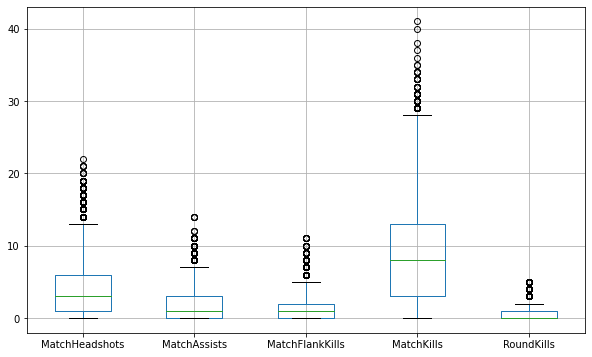

In [14]:
plt.figure(figsize=(10,6))
df.boxplot(column=["MatchHeadshots","MatchAssists","MatchFlankKills","MatchKills","RoundKills"])
plt.show()

--------------------------------------------------------------

* Se calcula la moda
* Con esto podemos decir que el mapa que mas se repite es "de_inferno" y el equipo mas comun dentro del set de datos es "Terrorist"
* Adicionalmente las derrotas(MatchWinner) son mas comunes dentro del set de datos, asistencias, kills, headshots, flanks practamente son 0 de cada match.
* La mayoria de los equipos no realiza headshots durante los partidos

In [15]:
df.mode()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,2.0,29.0,1,False,False,False,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4700.0,23500.0,2.0,0.0,0.0,1.0
1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--------------------------------------------------------------

* Calcular la varianza, pero por lo que modemos ver no hay mucho que extraer, "RLethalGrenadesThrown" es alta, por lo que se puede decir que varia mucho la cantidad(3.575864e) de granadas lanzadas por partido, tambien podemos decir que la cantidad de kills por ronda varia mucho o tambien que la cantidad de headshot es mas o menos parecida por match(1.054140e)
* Tambien podemos decir que  "AbnormalMatch" es  igual en todos los match (0)

In [16]:
df.var()

InternalTeamId                 2.500032e-01
MatchId                        2.236754e+04
RoundId                        5.524707e+01
MatchWinner                    2.490537e-01
Survived                       2.406985e-01
AbnormalMatch                  0.000000e+00
RLethalGrenadesThrown          3.575864e-01
RNonLethalGrenadesThrown       1.404008e+00
PrimaryAssaultRifle            2.154121e-01
PrimarySniperRifle             7.828613e-02
PrimaryHeavy                   5.699764e-03
PrimarySMG                     6.798427e-03
PrimaryPistol                  1.725998e-01
RoundKills                     7.775678e-01
RoundAssists                   1.486884e-01
RoundHeadshots                 3.350591e-01
RoundFlankKills                1.028104e-01
RoundStartingEquipmentValue    4.457526e+06
TeamStartingEquipmentValue     9.493001e+07
MatchKills                     3.837901e+01
MatchFlankKills                2.059656e+00
MatchAssists                   3.327073e+00
MatchHeadshots                 1

--------------------------------------------------------------

* Con los datos de la media podemos inferir varias cosas como por ejemplo:
* Hay 2 equipos (1 o 2) (InternalTeamId)
* La mayoria de los jugadores no sobrevive en las rondas (0.403540)
* La mayoria de los jugadores no mata por la espalda o laterales (0.095633)
* La mayoria de los jugadores mata aproximadamente 8 jugadores por partida (8.511578)

In [17]:
df.mean() 

InternalTeamId                     1.500006
MatchId                          250.525033
RoundId                           12.765517
MatchWinner                        0.469187
Survived                           0.403540
AbnormalMatch                      0.000000
RLethalGrenadesThrown              0.498667
RNonLethalGrenadesThrown           1.258057
PrimaryAssaultRifle                0.675363
PrimarySniperRifle                 0.089840
PrimaryHeavy                       0.005964
PrimarySMG                         0.007046
PrimaryPistol                      0.221787
RoundKills                         0.671349
RoundAssists                       0.146178
RoundHeadshots                     0.301553
RoundFlankKills                    0.095633
RoundStartingEquipmentValue     3778.108695
TeamStartingEquipmentValue     18890.133532
MatchKills                         8.511578
MatchFlankKills                    1.209912
MatchAssists                       1.874831
MatchHeadshots                  

--------------------------------------------------------------



* Viendo los datos de manera detallada, nos pudimos percatar que cada fila es un jugador dentro de una ronda, con esto en mente podemos seguir obteniendo mas información con respecto a los match

In [18]:
df 

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,340.272.074.099.723,4.048.177.852.924.460,1,1,1.0,0.0,0.0,0.0,0,2.277.596,0,0,0,0,5600,27100,4,0,2,2
79153,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,2.926.105.436.288.080,3.213.477.612.567.870,0,0,1.0,0.0,0.0,0.0,0,28.714.119,1,0,1,0,5500,27100,8,5,1,3
79154,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,5.914.717.797.783.930,6.005.168.938.274.500,1,1,1.0,0.0,0.0,0.0,0,297.689.228,0,0,0,0,4950,27100,5,0,2,3
79155,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,42.582.842.797.783.900,27.987.628.542.398.100,0,2,0.0,1.0,0.0,0.0,0,7.528.178,0,0,0,0,4950,27100,1,0,1,0


--------------------------------------------------------------

* Calculamos correlación de Pearson
* Podemos deducir que por ejemplo: a mayor numero de muertes, mayor mayor es la posibilidad de sobrevivir (0.331619)
* Tambien podemos decir que mientras mas asistencias tiene un jugador, menos posibiliaddes tiene de sobrevivir(-0.063264)
* Otra correlación que podemos deducir es que los jugadores que eligen "PrimarySniperRifle"(0.067100), "PrimaryHeavy" (0.002006) y PrimaryPistol (-0.173705) 
* No suelen sobrevivir al contrario de los que utlizan como los que utilizan "PrimaryAssaultRifle" (0.110008)

In [19]:
df_corr = df.corr()
df_corr

,InternalTeamId,MatchId,RoundId,Survived,AbnormalMatch,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
InternalTeamId,1.000000,0.000027,-0.000008,0.044872,NaN,0.039136,-0.005408,0.001750,0.042205,0.006337,0.004186,-0.032361,0.033085,0.019489,0.006104,0.020169,0.067674,0.073339,0.109532,0.169996,0.112188,0.008841
MatchId,0.000027,1.000000,0.001476,-0.003239,NaN,0.003009,-0.009234,-0.027313,0.043119,0.003769,0.017847,-0.002753,0.003271,0.003197,-0.023296,0.005110,0.013234,0.014364,0.008026,0.017832,0.012419,-0.052360
RoundId,-0.000008,0.001476,1.000000,-0.015361,NaN,0.065327,0.073314,0.085892,0.026291,-0.003975,-0.029860,-0.107013,0.009134,-0.002503,-0.003344,0.010332,0.117606,0.127420,0.807501,0.509277,0.588535,0.688221
Survived,0.044872,-0.003239,-0.015361,1.000000,NaN,0.171732,0.125064,0.110008,0.067100,0.002006,0.026469,-0.173705,0.331619,-0.063264,0.205279,0.139673,0.170578,0.173237,0.059445,0.041533,-0.008001,0.047407
AbnormalMatch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RLethalGrenadesThrown,0.039136,0.003009,0.065327,0.171732,NaN,1.000000,0.382635,0.326426,-0.018635,-0.023267,0.003408,-0.348568,0.162721,0.093738,0.080361,0.073273,0.438817,0.466507,0.110577,0.086692,0.106277,0.092965
RNonLethalGrenadesThrown,-0.005408,-0.009234,0.073314,0.125064,NaN,0.382635,1.000000,0.339062,-0.023421,-0.027057,-0.026666,-0.352804,0.148663,0.021319,0.100812,0.054749,0.368180,0.403791,0.099642,0.063542,0.073994,0.092548
PrimaryAssaultRifle,0.001750,-0.027313,0.085892,0.110008,NaN,0.326426,0.339062,1.000000,-0.440642,-0.108901,-0.119824,-0.776826,0.127903,0.065941,0.119863,0.063766,0.518780,0.627534,0.095224,0.087460,0.103451,0.142642
PrimarySniperRifle,0.042205,0.043119,0.026291,0.067100,NaN,-0.018635,-0.023421,-0.440642,1.000000,-0.024840,-0.026602,-0.171415,0.072187,-0.030621,-0.083883,0.004260,0.334221,0.199256,0.069314,0.001269,-0.016344,-0.057624
PrimaryHeavy,0.006337,0.003769,-0.003975,0.002006,NaN,-0.023267,-0.027057,-0.108901,-0.024840,1.000000,-0.005862,-0.042170,0.001692,0.002628,-0.002897,0.008143,-0.037131,-0.022217,-0.009765,-0.000579,-0.002852,-0.004694


--------------------------------------------------------------

Se coloca el grafico nuevamente para realizar un antes y despues de los outliers

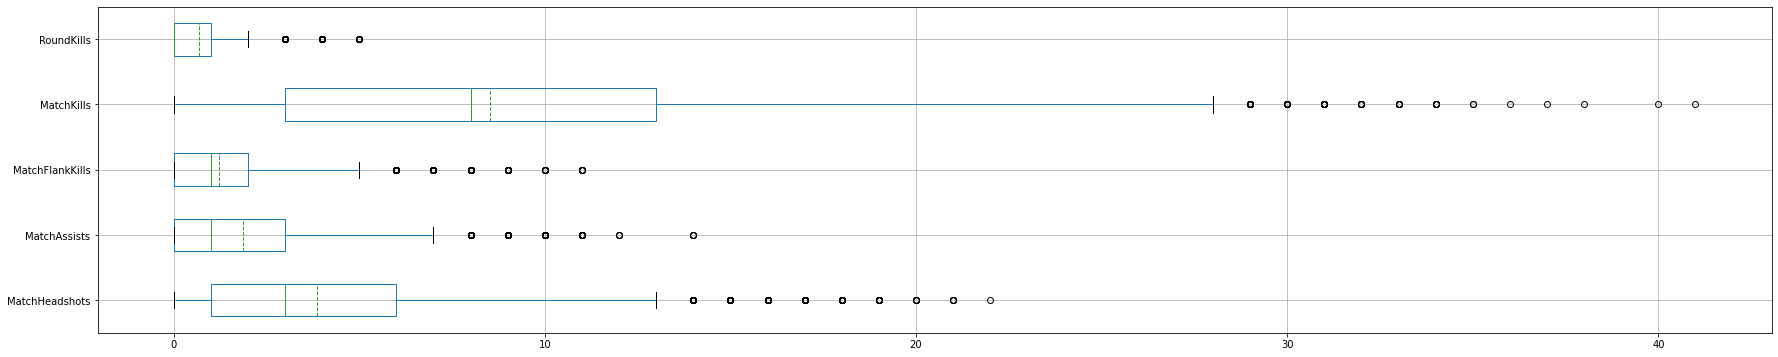

In [20]:
plt.figure(figsize=(30,6))
df.boxplot(column=["MatchHeadshots","MatchAssists","MatchFlankKills","MatchKills","RoundKills"], vert=False, showmeans=True, meanline=True, showfliers=True)
#plt.xlim(0, 15) Para ver los outliers en los graficos menores

plt.show()

Con el grafico pudimos ver los outliers y asi poder recortarlos de manera correcta como se ve a continuación:

In [21]:
df["MatchHeadshots"] = df["MatchHeadshots"].clip(lower=0, upper=14)

In [22]:
df["MatchAssists"] = df["MatchAssists"].clip(lower=0, upper=7)

In [23]:
df["RoundKills"] = df["RoundKills"].clip(lower=0, upper=2)

In [24]:
df["MatchFlankKills"] = df["MatchFlankKills"].clip(lower=0, upper=5)

In [25]:
df["MatchKills"] = df["MatchKills"].clip(lower=0, upper=28)

Una vez realizado, asi quedarian los datos sin los outliers vistos anteriormente

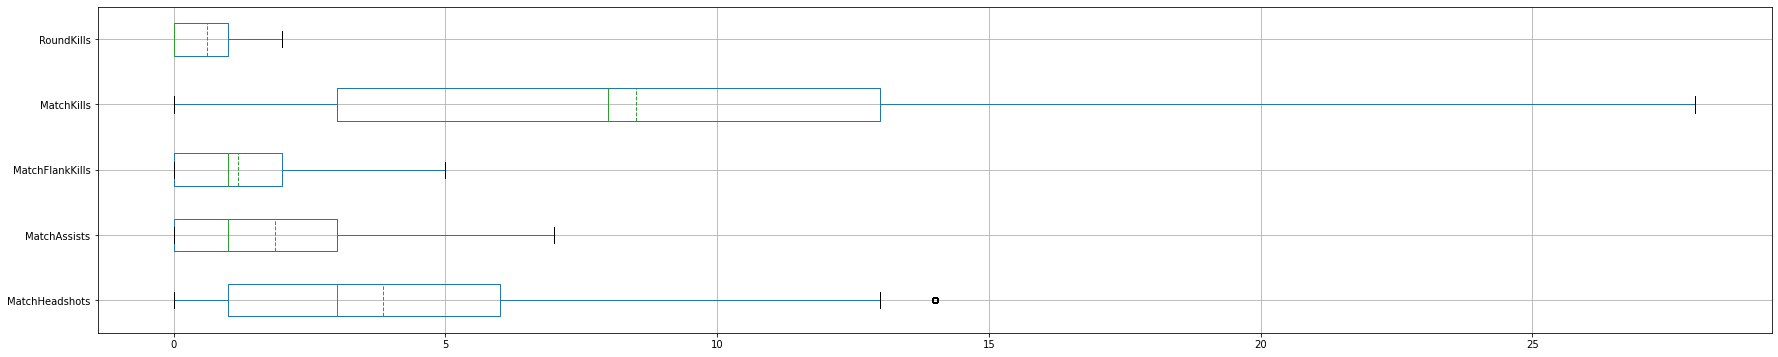

In [26]:
plt.figure(figsize=(30,6))
df.boxplot(column=["MatchHeadshots","MatchAssists","MatchFlankKills","MatchKills","RoundKills"], vert=False, showmeans=True, meanline=True, showfliers=True)
#plt.xlim(0, 15) Para ver los outliers en los graficos menores

plt.show()

* Comenzamos a analizar atributos. En este caso RoundWinner, podemos ver que hay distintos tipos de dato que quieren decirnos lo mismo

In [27]:
df.RoundWinner.unique()

array(['False', 'True', 'False4'], dtype=object)

--------------------------------------------------------------

* Conseguimos informacion sobre los tipos de datos en el dataframe y como observamos hay 2 booleanos, 4 float, 16 enteros y 7 tipo object

Dentro del set de datos tenemos ejemplos de:

*   Variables numéricas continuas:TimeAlive, TravelledDistance
*   Variables numéricas discretas: RoundStartingEquipmentValue, MatchId, InternalTeamId, RNonLethalGrenadesThrown
*   Variables categóricas nominales: Survived, RoundWinner, MatchWinner, Survived....


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79155 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  object 
 6   MatchWinner                  79156 non-null  object 
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   TimeAlive                    79157 non-null  object 
 10  TravelledDistance            79157 non-null  object 
 11  RLethalGrenadesThrown        79157 non-null  int64  
 12  RNonLethalGrenadesThrown     79157 non-null  int64  
 13  PrimaryAssaultRi

--------------------------------------------------------------

#	Preparación de los datos

* Se realiza un respaldo del dataframe

In [29]:
respaldo_df = df

--------------------------------------------------------------

* Se carga el dataFrame para poder realizar la limpieza de datos

In [30]:
new_df = respaldo_df

--------------------------------------------------------------

* Vemos los datos superficialmente para una primera impresión


In [31]:
new_df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0


--------------------------------------------------------------

* Vemos los tipos de datos de cada columna para ver que podriamos encontrar dentro de ellas, por lo que se ve "Map, Team, RoundWinner, MatchWinner, TimeAlive, TravelledDistance, FirstKillTime" tienen tipo object (string)
* Dentro de los datos de tipo object, podrian encontrar multiples datos no correspondientes por lo cual son prioridad revisar

In [32]:
new_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79155 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  object 
 6   MatchWinner                  79156 non-null  object 
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   TimeAlive                    79157 non-null  object 
 10  TravelledDistance            79157 non-null  object 
 11  RLethalGrenadesThrown        79157 non-null  int64  
 12  RNonLethalGrenadesThrown     79157 non-null  int64  
 13  PrimaryAssaultRi

--------------------------------------------------------------

* Averiguamos si existen registros con datos NaN (datos faltantes). Como podemos ver existen 3

In [33]:
new_df.isna().sum()

Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64

--------------------------------------------------------------

* Identificamos cada uno de los registros con informacion faltante para tratarlos


In [34]:
new_df[new_df.isna().any(axis=1)]

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
13,de_inferno,NaN,1,4,2,True,True,False,False,3.322.503.331.299.760,569.836.702.516.348,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,300,1300,0,0,0,0
27,de_inferno,NaN,2,4,3,False,False,True,False,3.923.181.899.670.340,92.207.583.079.108,1,0,0.0,0.0,0.0,1.0,0,3.923.182,1,0,0,0,3250,22850,2,0,1,1
29,de_inferno,CounterTerrorist,2,4,3,False4,NaN,True,False,3.923.181.899.670.340,6.605.491.069.771.230,0,0,1.0,0.0,0.0,0.0,0,5.112.025,0,0,0,0,4250,22850,2,0,1,2


--------------------------------------------------------------

* Con la función drop eliminamos los datos nan, debido a que no son necesarios porque son 3 datos entre 79157 por lo cual determinamos que no eran significantes modificarlos u alterarlos para que continuaran dentro

In [35]:
new_df.drop(new_df[new_df.isna().any(axis=1)].index,inplace=True)

--------------------------------------------------------------

* Comenzamos a analizar atributos. En este caso RoundWinner contiene ['False', 'True', True, False]
* Por lo que podemos ver que contiene booleanos  y booleanos como texto, por lo cual lo correcto seria dejarlos ambos como texto para posteriormente 

In [36]:
new_df.RoundWinner.unique()

array(['False', 'True'], dtype=object)

--------------------------------------------------------------

* Con el siguiente comando convertimos tanto los booleanos como los textos booleanos a binario, para poder trabajarlos de mejor forma


In [37]:
new_df['RoundWinner'] = new_df['RoundWinner'].map({'True': 1, 'False': 0, True:1, False:0})

--------------------------------------------------------------

* Verificamos los datos de MatchWinner para realizar el mismo paso que el anterior


In [38]:
new_df['MatchWinner'].unique()

array([True, False], dtype=object)

--------------------------------------------------------------

* Se realiza lo mismo que el procedimiento anterior, covertir booleanos a binario


In [39]:
new_df['MatchWinner'] = new_df['MatchWinner'].map({True:1, False:0})

--------------------------------------------------------------

* Verificamos los datos de MatchWinner para realizar el mismo paso que el anterior


In [40]:
new_df['Survived'].unique()

array([False,  True])

--------------------------------------------------------------

* Se realiza lo mismo que el procedimiento anterior, covertir booleanos a binario


In [41]:
new_df['Survived'] = new_df['Survived'].map({True:1, False:0})

--------------------------------------------------------------

* Verificamos tipos de datos en AbnormalMatch


In [42]:
new_df["AbnormalMatch"].unique()

array([False])

--------------------------------------------------------------

* Como todos los datos eran False se realizo al coversión realidad de manera directa


In [43]:
new_df['AbnormalMatch'] = 0

--------------------------------------------------------------

* Mostramos todos los datos para ver sus nuevos valores

In [44]:
new_df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,0,1,0,0,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,0,1,0,0,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,0,1,0,0,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,0,1,0,0,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,0,1,1,0,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0


--------------------------------------------------------------

* Acá verificamos los datos de manera aleatoria, en caso de

In [45]:
new_df.sample(5)

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
4620,de_mirage,Terrorist,1,29,3,0,1,1,0,10.881.990.450.654.900,13.285.758.905.893.300,1,1,1.000000,0.000000,0.0,0.0,0,834.286,2,1,2,0,4700,23600,3,0,3,3
8673,de_inferno,CounterTerrorist,1,53,19,0,0,1,0,3.692.527.289.555.490,4.040.426.873.630.130,2,0,1.000000,0.000000,0.0,0.0,0,333.695.068,1,3,0,1,5250,26350,4,4,6,1
76496,de_mirage,CounterTerrorist,2,499,10,1,1,0,0,62.886.308.814.830.200,10.716.447.054.635.100,0,2,0.008395,0.991605,0.0,0.0,0,36.131.496.399.999.900,1,0,0,0,5450,20400,4,0,0,0
59911,de_dust2,Terrorist,1,378,4,0,0,0,0,4.918.891.960.774.980,6.198.368.657.734.320,2,2,1.000000,0.000000,0.0,0.0,0,45.203.796.399.999.900,1,1,0,0,4400,24400,6,0,1,2
29318,de_nuke,Terrorist,2,170,24,0,0,0,0,895.144.000.956.023,8.840.817.707.471.840,1,3,1.000000,0.000000,0.0,0.0,0,29.494.087.199.999.900,0,0,0,0,4400,16050,14,2,3,6


--------------------------------------------------------------

* Se crea nuevo atributo basado en dos atributos ya presentes en el set de datos:
* Total de granadas arrojadas en el round, independientemente de si son de tipo letal o no
* RTotalGrenadesThrown = RLethalGrenadesThrown + RNonLethalGrenadesThrown

In [46]:
df['RTotalGrenadesThrown'] = df['RLethalGrenadesThrown'] + df['RNonLethalGrenadesThrown']

--------------------------------------------------------------

 * Revisamos si contiene timeAlive algun texto

In [47]:
new_df[new_df['TimeAlive'].str.contains(pat = '/\b\w+\b/i', regex = True)]

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,RTotalGrenadesThrown


--------------------------------------------------------------

* Revisamos si contiene TravelledDistance algun texto

In [48]:
new_df[new_df['TravelledDistance'].str.contains(pat = '/\b\w+\b/i', regex = True)] 

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,RTotalGrenadesThrown


--------------------------------------------------------------

* Revisamos si contiene FirstKillTime algun texto

In [49]:
new_df[new_df['FirstKillTime'].str.contains(pat = '/\b\w+\b/i', regex = True)]                  

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,RTotalGrenadesThrown


--------------------------------------------------------------

* Acá generamos el binary encode para el atributo Roundwinner

In [50]:
new_df = pd.get_dummies(new_df, columns=['RoundWinner'])

--------------------------------------------------------------

* Revisamos si se realizaron los cambios en los atributos

In [51]:
new_df.head()

,Map,Team,InternalTeamId,MatchId,RoundId,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,RTotalGrenadesThrown,RoundWinner_0,RoundWinner_1
0,de_inferno,Terrorist,1,4,1,1,0,0,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,4,1,0
1,de_inferno,Terrorist,1,4,1,1,0,0,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0,1,0
2,de_inferno,Terrorist,1,4,1,1,0,0,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0,1,0
3,de_inferno,Terrorist,1,4,1,1,0,0,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0,1,0
4,de_inferno,Terrorist,1,4,1,1,1,0,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,2,1,0


--------------------------------------------------------------

Eliminamos los puntos de "TimeAlive" y "TravelledDistance" debido a que el archivo en el que vienen los considera con puntos, pero el dato real es sin puntos. Adicionalmente quitamos 4 digitos para poder trabajar con ellos.

In [52]:
new_df['TimeAlive'] = new_df['TimeAlive'].str.replace(".","").str[:-4]
new_df['TravelledDistance'] = new_df['TravelledDistance'].str.replace(".","").str[:-4]
new_df['FirstKillTime'] = new_df['FirstKillTime'].str.replace(".","")

Convertimos los textos a numeros y los vacios a Nan

In [53]:
new_df['TimeAlive'] = pd.to_numeric(new_df['TimeAlive'], errors='coerce')
new_df['TravelledDistance'] = pd.to_numeric(new_df['TravelledDistance'], errors='coerce')
new_df['FirstKillTime'] = pd.to_numeric(new_df['FirstKillTime'], errors='coerce')

Convertimos los Nan en 0

In [54]:
new_df["TimeAlive"] = new_df["TimeAlive"].fillna(0)
new_df["TravelledDistance"] = new_df["TravelledDistance"].fillna(0)
new_df["FirstKillTime"] = new_df["FirstKillTime"].fillna(0)


In [55]:
new_df[new_df.isna().any(axis=1)]

,Map,Team,InternalTeamId,MatchId,RoundId,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,RTotalGrenadesThrown,RoundWinner_0,RoundWinner_1


* Con binary encode cambiamos los valores del atributo Survived

In [56]:
new_df = pd.get_dummies(new_df, columns=['Survived'])

--------------------------------------------------------------

:* Se elimina InternalTeamId debido es lo mismo que team, solo que utilizando 1 y 2 por tanto es redundante la información que entrega.

In [57]:
new_df.drop("InternalTeamId", axis=1, inplace=True)

--------------------------------------------------------------

* Con binary encode cambiamos los valores del atributo MatchWinner

In [58]:
#new_df = pd.get_dummies(new_df, columns=['MatchWinner'])

--------------------------------------------------------------

* Con binary encode cambiamos los valores del atributo Team

In [59]:
new_df = pd.get_dummies(new_df, columns=['Team'])

--------------------------------------------------------------

* Importamos el labelEncoder y OneHotEncoder para su uso posterior

In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

--------------------------------------------------------------

* OHE para cambiar las variables categoricas a númericas

In [61]:
one_hot = ohe.fit_transform(new_df[['Map']])
nombre_mapas = [Map for Map in ohe.categories_[0]]
new_map_onehot = pd.DataFrame(one_hot.toarray(), columns=nombre_mapas)

--------------------------------------------------------------

* Acá eliminamos el atributo Map

In [62]:
new_df.drop('Map', axis=1, inplace=True)

--------------------------------------------------------------

* Acá concadenamos el dataframe antiguo con el nuevo dataframe y los valores del atributo Map

In [63]:
new_df = pd.concat([new_df,new_map_onehot],axis=1)

--------------------------------------------------------------

* Acá creamos nuevas variables con el total de las granadas lanzadas en las partidas

In [64]:
new_df['RTotalGrenadesThrown'] = new_df['RLethalGrenadesThrown'] + new_df['RNonLethalGrenadesThrown']

--------------------------------------------------------------

In [65]:
new_df = new_df.dropna()

# Correlación en base al encoder realizado

* Se calcula la correlación en base al MatchWinner

Con esto podemos decir que con respecto a nuestro target "MathWinner_1" podemos usar:

1.   RoundWinner_1, ya que indica que mientras mas rondas gane el equipo mas probable es que gane la partida.

2.   Team_Terrorist, podemos decir que el team_terrorist tiene mas probabilidad de ganar.

3.   




In [66]:
corr_matrix = new_df.corr()
corr_matrix["MatchWinner"].sort_values(ascending=False)

MatchWinner                    1.000000
RoundWinner_1                  0.229516
Survived_0                     0.143474
PrimaryPistol                  0.138699
Team_Terrorist                 0.050720
de_mirage                      0.017610
PrimaryHeavy                   0.011188
TimeAlive                      0.008267
TravelledDistance              0.007429
de_dust2                       0.005903
de_nuke                        0.003556
MatchId                       -0.013378
RoundId                       -0.019125
FirstKillTime                 -0.019964
de_inferno                    -0.023544
PrimarySMG                    -0.029347
PrimarySniperRifle            -0.029809
RoundFlankKills               -0.045309
Team_CounterTerrorist         -0.050720
RoundAssists                  -0.060214
RoundHeadshots                -0.067310
RNonLethalGrenadesThrown      -0.087328
PrimaryAssaultRifle           -0.102797
RoundKills                    -0.107211
MatchFlankKills               -0.114353


--------------------------------------------------------------

* Se grafica el RoundWinner_1

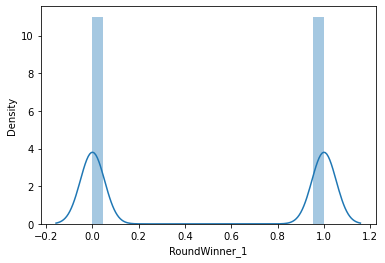

In [67]:
sb.distplot(new_df.RoundWinner_1)

--------------------------------------------------------------

* Se borra la columna AbnormalMatch que no es relevante para el estudio de los datos


In [68]:
new_df.drop('AbnormalMatch', axis=1, inplace= True)

In [69]:
new_df.isna().sum()

MatchId                        0
RoundId                        0
MatchWinner                    0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
RTotalGrenadesThrown           0
RoundWinner_0                  0
RoundWinner_1                  0
Survived_0                     0
Survived_1                     0
Team_CounterTerrorist          0
Team_Terrorist                 0
de_dust2  

--------------------------------------------------------------

* Acá vemos las correlaciones que tienen los atributos con MatchWinner_1

In [70]:
new_df.corrwith(new_df['MatchWinner']).sort_values(ascending=False)

MatchWinner                    1.000000
RoundWinner_1                  0.229516
Survived_0                     0.143474
PrimaryPistol                  0.138699
Team_Terrorist                 0.050720
de_mirage                      0.017610
PrimaryHeavy                   0.011188
TimeAlive                      0.008267
TravelledDistance              0.007429
de_dust2                       0.005903
de_nuke                        0.003556
MatchId                       -0.013378
RoundId                       -0.019125
FirstKillTime                 -0.019964
de_inferno                    -0.023544
PrimarySMG                    -0.029347
PrimarySniperRifle            -0.029809
RoundFlankKills               -0.045309
Team_CounterTerrorist         -0.050720
RoundAssists                  -0.060214
RoundHeadshots                -0.067310
RNonLethalGrenadesThrown      -0.087328
PrimaryAssaultRifle           -0.102797
RoundKills                    -0.107211
MatchFlankKills               -0.114353


--------------------------------------------------------------

* Se grafica el dataframe completo con los datos ya tratados y transformados


In [71]:
#sb.pairplot(new_df)

#Normalización

In [72]:
from sklearn.preprocessing import StandardScaler

--------------------------------------------------------------

* Acá normalizaremos los datos de los atributos del dataset para continuar con la siguiente fase que seria Modelado.
* Esto se realizará para escalar los datos en un rango específico, para que ninguna característica tenga un peso mayor en el análisis o modelado debido a que tiene un rango de valores más amplio.

In [73]:
numeric_columns = new_df[["RoundWinner_1", "Survived_0", "PrimaryPistol", 
                      "Team_Terrorist", "de_mirage", "PrimaryHeavy", "de_dust2", "de_nuke", 
                      "RoundId", "de_inferno", "PrimarySMG", "PrimarySniperRifle", "RoundFlankKills", 
                      "Team_CounterTerrorist", "RoundAssists", "RoundHeadshots", 
                      "RNonLethalGrenadesThrown", "PrimaryAssaultRifle", "RoundKills", "MatchFlankKills", 
                      "RTotalGrenadesThrown", "Survived_1", "MatchHeadshots", "RLethalGrenadesThrown", 
                      "MatchAssists", "RoundStartingEquipmentValue", "MatchKills", "TeamStartingEquipmentValue", 
                      "RoundWinner_0","TimeAlive", "TravelledDistance","FirstKillTime"]]

* Con el siguiente código escalaremos los datos 

In [74]:
scaler = StandardScaler()
scaled_numeric_columns = scaler.fit_transform(numeric_columns)

In [75]:
new_df[["RoundWinner_1", "Survived_0", "PrimaryPistol", 
"Team_Terrorist", "de_mirage", "PrimaryHeavy", "de_dust2", "de_nuke", 
"RoundId", "de_inferno", "PrimarySMG", "PrimarySniperRifle", "RoundFlankKills", 
"Team_CounterTerrorist", "RoundAssists", "RoundHeadshots", 
"RNonLethalGrenadesThrown", "PrimaryAssaultRifle", "RoundKills", "MatchFlankKills", 
"RTotalGrenadesThrown", "Survived_1", "MatchHeadshots", "RLethalGrenadesThrown", 
"MatchAssists", "RoundStartingEquipmentValue", "MatchKills", "TeamStartingEquipmentValue", 
"RoundWinner_0","TimeAlive", "TravelledDistance","FirstKillTime"]] = scaled_numeric_columns

--------------------------------------------------------------

* Revisamos los datos que esten normalizados y escalados para su posterior uso

In [76]:
new_df.head()

,MatchId,RoundId,MatchWinner,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,RTotalGrenadesThrown,RoundWinner_0,RoundWinner_1,Survived_0,Survived_1,Team_CounterTerrorist,Team_Terrorist,de_dust2,de_inferno,de_mirage,de_nuke
0,4.0,-1.58304,1.0,2.716596,-0.155202,-0.833916,2.314000,-1.455186,-0.321082,-0.078995,-0.085385,1.873164,-0.465436,-0.823831,-0.379109,-0.52097,-0.298269,-1.434239,-1.487192,-1.37688,-0.874768,-1.049676,-1.201242,1.477908,0.999785,-0.999785,0.822519,-0.822519,-0.999608,0.999608,-0.56436,1.319962,-0.562394,-0.42582
1,4.0,-1.58304,1.0,-0.542498,3.799418,-0.833916,-1.061763,-1.455186,-0.321082,-0.078995,-0.085385,1.873164,-0.465436,-0.823831,-0.379109,-0.52097,-0.298269,-1.410557,-1.487192,-1.37688,-0.874768,-1.049676,-1.201242,-1.157397,0.999785,-0.999785,0.822519,-0.822519,-0.999608,0.999608,-0.56436,1.319962,-0.562394,-0.42582
2,4.0,-1.58304,1.0,-0.585226,-0.500383,-0.833916,-1.061763,-1.455186,-0.321082,-0.078995,-0.085385,1.873164,-0.465436,-0.823831,-0.379109,-0.52097,-0.298269,-1.315828,-1.487192,-1.37688,-0.874768,-1.049676,-1.201242,-1.157397,0.999785,-0.999785,0.822519,-0.822519,-0.999608,0.999608,-0.56436,1.319962,-0.562394,-0.42582
3,4.0,-1.58304,1.0,-0.513286,-0.242231,-0.833916,-1.061763,-1.455186,-0.321082,-0.078995,-0.085385,1.873164,-0.465436,-0.823831,-0.379109,-0.52097,-0.298269,-1.386875,-1.487192,-1.37688,-0.874768,-1.049676,-1.201242,-1.157397,0.999785,-0.999785,0.822519,-0.822519,-0.999608,0.999608,-0.56436,1.319962,-0.562394,-0.42582
4,4.0,-1.58304,1.0,-0.475354,-0.094379,0.838416,-0.217823,-1.455186,-0.321082,-0.078995,-0.085385,1.873164,-0.465436,-0.823831,-0.379109,-0.52097,-0.298269,-1.315828,-1.487192,-1.37688,-0.874768,-1.049676,-1.201242,0.160255,0.999785,-0.999785,-1.215778,1.215778,-0.999608,0.999608,-0.56436,1.319962,-0.562394,-0.42582


--------------------------------------------------------------

In [77]:
new_df.isna().sum()

MatchId                        0
RoundId                        0
MatchWinner                    0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
RTotalGrenadesThrown           0
RoundWinner_0                  0
RoundWinner_1                  0
Survived_0                     0
Survived_1                     0
Team_CounterTerrorist          0
Team_Terrorist                 0
de_dust2  

# Evaluación 4 y ET

# Modelado

* El modelo que ocuparemos es de clasificación, que es regresión logística, ya que ocuparemos un target categorico binario que es "MatchWinner".
* Con esto buscaremos predecir si una observación pertenece a una de dos categorías, que en este caso es si ganó o perdió en la partida, esto lo utilizaremos para el entrenamiento del modelo de ML.

--------------------------------------------------------------

Importación de librerias de para realizar el modelamiento con random forest

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import roc_auc_score

--------------------------------------------------------------

*   Aca podemos apreciar que los datos un balance de aproximado de 55% y 45% lo que es muy bueno para realizar el modelado. 

In [79]:
pd.value_counts(new_df['MatchWinner'], sort = 1) #class comparison 0=Derrota 1=Victoris

0.0    42013
1.0    37138
Name: MatchWinner, dtype: int64

##### Separamos victorias y derrotas REVISAR

In [80]:
defeat_df = new_df[new_df.MatchWinner == 0] #registros de Derrota
win_df = new_df[new_df.MatchWinner == 1] #casos de Victoria

--------------------------------------------------------------

#Creación de Dataset

Generamos 2 variables X e Y donde:


*   Y estan los resultado de "MatchWinner", es decir nuestro target (testing) 
*   X las variables que pueden llevar a cabo nuestras variables para entrenar a la IA (training)
*   En el modelo utilizamos buenas practicas donde damos el 70% de los datos para training y 30% para testing




In [81]:
y = new_df['MatchWinner']
X = new_df.drop('MatchWinner', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# RANDOM FOREST

* Comenzamos el entrenamiento del random forest con 100 arboles para ver posibles resultados.

*  Boostrap para que cada arbol se entrene con una muestra diferente de los datos del modelo

*  verbose para mostrar una barra de progreso de durante el entrenamiento (ver duración de este)

* max_features = 'sqrt' para ayudar a reducir la complejidad del nodo y prevenir posibles sobreajustes

In [97]:
model_randomforest = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,verbose=2,
                               max_features = 'sqrt')
model_randomforest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.4s finished


RandomForestClassifier(max_features='sqrt', verbose=2)

--------------------------------------------------------------

In [98]:
pred_y = model_randomforest.predict(X_test)
print(classification_report(y_test, pred_y))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77     12624
         1.0       0.75      0.69      0.72     11122

    accuracy                           0.75     23746
   macro avg       0.75      0.74      0.74     23746
weighted avg       0.75      0.75      0.75     23746



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


--------------------------------------------------------------

# SVM No lineal

* Entrenar el clasificador SVM con los datos de entrenamiento
* Utilizar el clasificador entrenado para predecir las etiquetas de los datos de prueba
* Despues de estos 2 pasos imprimimos el reporte de desempeño

In [84]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69     12624
         1.0       0.65      0.64      0.65     11122

    accuracy                           0.67     23746
   macro avg       0.67      0.67      0.67     23746
weighted avg       0.67      0.67      0.67     23746



--------------------------------------------------------------

#KNN (K-Nearest Neighbors)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

Para realizar KNN decidimos realizar con 3 vecinos para comenzar esta prueba y realizar el entrenamiento.

Con los resultados podemos apreciar que son mejores que el random forest utilizando el ajuste basico.

In [89]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83     12624
         1.0       0.81      0.82      0.81     11122

    accuracy                           0.82     23746
   macro avg       0.82      0.82      0.82     23746
weighted avg       0.82      0.82      0.82     23746



--------------------------------------------------------------

# XGBOOST

In [91]:
pip install category_encoders xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import xgboost as xgb

In [93]:
train_dmatrix = xgb.DMatrix(data = X_train , label = y_train )
test_dmatrix = xgb.DMatrix(data = X_test, label = y_test)

params = {'objective': 'binary:logistic', 'max_depth': 2}

model_xgboost = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=250)

predictions = model_xgboost.predict(test_dmatrix)

accuracy = (predictions > 0.5) == y_test
print('Accuracy:', accuracy.mean())

Accuracy: 0.7084140486818833


--------------------------------------------------------------

* Utilizaremos la función roc_auc_score de scikit-learn para calcular el AUC a partir de las etiquetas reales y_test y las predicciones del modelo y_pred. 
* Y como vemos el resultado es de 0.66%, que indica ni un mal ni un buen rendimiento del modelo.
Basicamente tiene un 66% de probabilidad de ocurrencia.

In [87]:
auc = roc_auc_score(y_test, y_pred)
print("AUC: ", auc)

AUC:  0.6689904587420679


--------------------------------------------------------------

# Puesta en producción

* Creamos el archivo modelo.pkl para la puesta en marcha.

In [99]:
archivo = 'checkpoints\modelo.pkl'
pickle.dump(model_randomforest, open(archivo, 'wb'))